### Feature Selection based on Mutual Information(Entropy) Gain for classification and Regression problems
#### What is Mutual Information?


The mutual information of two random variables is a measure of mutual dependence between two variables.The elimination process aims to reduce the size of the input feature set and at the same time to retain the class discriminatory information for classification problems.

Mutual information is measure of the amount of information between two random variables is symmetric and non negative, and it could be `zero` if and only if the varibles are independent. 
    <img src='2.1)Mutual Information.JPG'>

ONE PROBLEM EXAMPLE:
<IMG src='problem.JPG'>

- I(A,B) = H(A) - H(A/B)
- H(A) = Sum of all(p(ai) * Log Base 2 (1/p(ai)))
- for p(ai) we add row values
- H(B) = Sum of all(p(bi)* Log Base 2 (1/p(bi)))
- p(bi) we add coulum values
-  H(A/B) = H(A,B) - H(B)
- H(A,B) = Sum of all (p(i)[Log Base 2(1/p(i)])

### Classification Problem

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
from sklearn.model_selection import  train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [102]:
from sklearn.feature_selection import VarianceThreshold,mutual_info_classif,mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [103]:
data = pd.read_csv('santander-train.csv',nrows=20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [104]:
X = data.drop('TARGET',axis=1)
y = data['TARGET']

In [105]:
X.shape,y.shape

((20000, 370), (20000,))

In [106]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1,stratify=y)

In [107]:
X_train.shape,X_test.shape

((16000, 370), (4000, 370))

### Remove constant,quasi constant and duplicate features

Constant Removal,Passing a value of zero for the parameter will filter all the features with zero variance. Execute the following script to create a filter for constant features.

In [108]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)

VarianceThreshold(threshold=0)

In [109]:
# show all results True that is not constant
constant_filter.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,

In [110]:
constant_filter.get_support().sum()

290

In [111]:
constant_list = [not temp for temp in constant_filter.get_support()]

In [112]:
# constant feature list
# X.columns[constant_list]

In [113]:
X_train_not_constant = constant_filter.transform(X_train)
X_test_not_constant = constant_filter.transform(X_test)
X_train_not_constant.shape,X_test_not_constant.shape

((16000, 290), (4000, 290))

In [114]:
370-290

80

We successfuly removed 80 features that are constant. 

##### Now we will remove quasi constant features

In [115]:
quasi_ConstantFilter = VarianceThreshold(threshold=0.01)


In [116]:
quasi_ConstantFilter.fit(X_train_not_constant)
X_train_new = quasi_ConstantFilter.transform(X_train_not_constant)
X_test_new = quasi_ConstantFilter.transform(X_test_not_constant)

In [117]:
X_train_new = pd.DataFrame(X_train_new)
X_test_new = pd.DataFrame(X_test_new)

In [118]:
X_train_new

,0,1,2,3,4,5,6,7,8,9,...,236,237,238,239,240,241,242,243,244,245
0,14.0,2.0,27.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94956.660000
1,9580.0,2.0,38.0,0.0,69.42,483.30,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
2,22549.0,2.0,52.0,0.0,103.71,164.91,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62614.290000
3,5400.0,2.0,39.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47024.610000
4,21274.0,2.0,25.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65467.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,36162.0,2.0,35.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101460.780000
15996,6849.0,2.0,38.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48378.690000
15997,30145.0,2.0,23.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,292785.330000
15998,37855.0,2.0,23.0,0.0,144.39,280.53,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [119]:
290-246,370-246

(44, 124)

We removed 44 quasi_constant features also and total 124 features have removed.

#### Remove Duplicate Feature(100% similar value)

SKlearn has no direct library to handle duplicate value but python has method to separate duplicate rows so for this we first we convert all columns into rows.

In [120]:
X_train_T = X_train_new.T
X_test_T = X_test_new.T

In [121]:
X_train_T

,0,1,2,3,4,5,6,7,8,9,...,15990,15991,15992,15993,15994,15995,15996,15997,15998,15999
0,14.00,9580.000000,22549.00,5400.00,21274.00,28648.000000,17005.000000,37420.00,25926.0,5809.00,...,18868.000000,5914.00,20826.00,17575.00,25488.00,36162.00,6849.00,30145.00,37855.000000,19872.00
1,2.00,2.000000,2.00,2.00,2.00,2.000000,2.000000,2.00,2.0,2.00,...,2.000000,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.000000,2.00
2,27.00,38.000000,52.00,39.00,25.00,23.000000,26.000000,25.00,24.0,26.00,...,27.000000,42.00,51.00,38.00,23.00,35.00,38.00,23.00,23.000000,45.00
3,0.00,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.00,0.0,0.00,...,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00
4,0.00,69.420000,103.71,0.00,0.00,0.000000,0.000000,0.00,0.0,239.85,...,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,144.390000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,0.00,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.00,0.0,0.00,...,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00
242,0.00,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.00,0.0,0.00,...,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00
243,0.00,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.00,0.0,0.00,...,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00
244,0.00,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.00,0.0,0.00,...,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00


In [122]:
X_train_T.duplicated().sum()

19

In [123]:
duplicated_feature = X_train_T.duplicated()
duplicated_feature

0      False
1      False
2      False
3      False
4      False
       ...  
241    False
242    False
243    False
244    False
245    False
Length: 246, dtype: bool

In [124]:
Feature_to_keep = [not temp for temp in duplicated_feature]

In [125]:
X_train_unique = X_train_T[Feature_to_keep].T
X_test_unique = X_test_T[Feature_to_keep].T

In [126]:
X_train_unique.shape,X_test_unique.shape

((16000, 227), (4000, 227))

In [127]:
X_train.shape

(16000, 370)

In [128]:
370-227

143

143 constant, quasi-constant, duplicated features are successfuly removed.

### Calculate Mutual Information

In [129]:
mi = mutual_info_classif(X_train_unique,y_train)

In [130]:
len(mi)

227

In [131]:
print(mi)

[2.18884868e-04 5.83403442e-04 1.17183232e-02 0.00000000e+00
 8.64620138e-04 8.86046241e-04 6.05242205e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.40670627e-03 0.00000000e+00
 2.39682559e-04 1.47273646e-04 4.20404283e-04 0.00000000e+00
 1.54372113e-03 1.26310513e-03 1.46257733e-03 0.00000000e+00
 0.00000000e+00 2.79826696e-03 8.50266624e-03 5.36912179e-04
 3.18906715e-04 2.20579197e-03 5.30249330e-04 2.51697393e-03
 6.28022545e-04 3.02450693e-03 1.84731013e-03 2.35734329e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.29949757e-04 8.87096400e-03 1.39424398e-03
 0.00000000e+00 3.21489406e-03 2.65578959e-03 2.27863117e-03
 0.00000000e+00 1.05166967e-02 3.73642237e-03 9.47896509e-03
 0.00000000e+00 0.00000000e+00 3.41985957e-03 6.68807464e-04
 2.45592588e-03 1.11101545e-03 1.70289196e-03 1.48309767e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.13538145e-04 0.00000000e+00 4.04332505e-04 8.52946295e-04
 2.40515908e-03 8.594350

In [132]:
type(mi)

numpy.ndarray

In [133]:
mi = pd.Series(mi)


In [134]:
mi

0      0.000219
1      0.000583
2      0.011718
3      0.000000
4      0.000865
         ...   
222    0.001681
223    0.000000
224    0.000000
225    0.001993
226    0.002207
Length: 227, dtype: float64

In [135]:
mi.index = X_train_unique.columns

In [136]:
mi.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            236, 237, 238, 239, 240, 241, 242, 243, 244, 245],
           dtype='int64', length=227)

In [137]:
mi.sort_values(ascending=False,inplace=True)

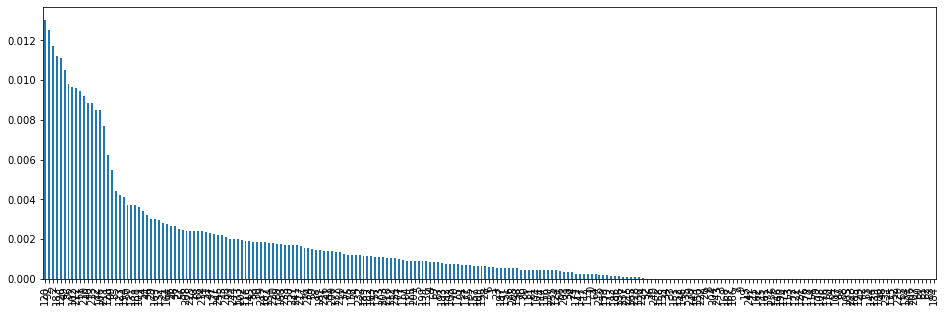

In [138]:
mi.plot.bar(figsize=(16,5))

You can see that after almost 60% on x axis features have zero mutual information that means yet in groups these feature play a vital role but individualy in a univariate method these features have not any impact in training dataset or enough information for classification. 

In [139]:
#  creat a features percentage selector
sel = SelectPercentile(mutual_info_classif,percentile=10).fit(X_train_unique,y_train)

In [140]:
X_train_unique.columns[sel.get_support()]

Int64Index([  2,  21,  22,  40,  49,  50,  51,  85,  86,  92, 101, 102, 106,
            120, 126, 128, 129, 183, 210, 211, 212, 213, 225],
           dtype='int64')

In [141]:
len(X_train_unique.columns[sel.get_support()])

23

In [142]:
help(sel)

Help on SelectPercentile in module sklearn.feature_selection._univariate_selection object:

class SelectPercentile(_BaseFilter)
 |  SelectPercentile(score_func=<function f_classif at 0x1BF164A8>, percentile=10)
 |  
 |  Select features according to a percentile of the highest scores.
 |  
 |  Read more in the :ref:`User Guide <univariate_feature_selection>`.
 |  
 |  Parameters
 |  ----------
 |  score_func : callable
 |      Function taking two arrays X and y, and returning a pair of arrays
 |      (scores, pvalues) or a single array with scores.
 |      Default is f_classif (see below "See also"). The default function only
 |      works with classification tasks.
 |  
 |  percentile : int, optional, default=10
 |      Percent of features to keep.
 |  
 |  Attributes
 |  ----------
 |  scores_ : array-like of shape (n_features,)
 |      Scores of features.
 |  
 |  pvalues_ : array-like of shape (n_features,)
 |      p-values of feature scores, None if `score_func` returned only score

In [143]:
X_train_mi = sel.transform(X_train_unique)
X_test_mi = sel.transform(X_test_unique)

In [144]:
X_train_mi.shape,X_test_mi.shape

((16000, 23), (4000, 23))

### Build the model and compare the performance

In [145]:
def run_randomForest(X_train,X_test,y_train,y_test):
    clf = RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy On Test Set:')
    print(accuracy_score(y_test,y_pred))

In [146]:
%%time
run_randomForest(X_train,X_test,y_train,y_test)

Accuracy On Test Set:
0.958
Wall time: 1.99 s


In [147]:
%%time
run_randomForest(X_train_unique,X_test_unique,y_train,y_test)

Accuracy On Test Set:
0.958
Wall time: 1.33 s


In [148]:
%%time
run_randomForest(X_train_mi,X_test_mi,y_train,y_test)

Accuracy On Test Set:
0.95775
Wall time: 444 ms


In [150]:
(1.99-0.444)*100/1.99

77.68844221105527

Bam! one clap for your's we reduce too much training time.

### Mutual information gain in Regression

In [151]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [152]:
boston = load_boston()

In [156]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [157]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Create a DataFrame using this boston data set.

In [159]:
X = pd.DataFrame(data=boston.data,columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [165]:
y = boston.target

In [218]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [219]:
mi = mutual_info_regression(X_train,y_train)
mi = pd.Series(mi)

In [220]:
mi.index = X_train.columns
mi.index

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [221]:
mi

CRIM       0.351305
ZN         0.199473
INDUS      0.511599
CHAS       0.019293
NOX        0.454419
RM         0.561597
AGE        0.342796
DIS        0.320216
RAD        0.216069
TAX        0.392735
PTRATIO    0.490620
B          0.147071
LSTAT      0.681849
dtype: float64

In [222]:
mi.sort_values(ascending=False,inplace=True)

In [223]:
mi

LSTAT      0.681849
RM         0.561597
INDUS      0.511599
PTRATIO    0.490620
NOX        0.454419
TAX        0.392735
CRIM       0.351305
AGE        0.342796
DIS        0.320216
RAD        0.216069
ZN         0.199473
B          0.147071
CHAS       0.019293
dtype: float64

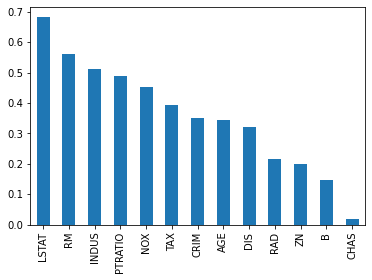

In [224]:
mi.plot.bar()

In [225]:
sel = SelectKBest(mutual_info_regression,k=9).fit(X_train,y_train)
X_train.columns[sel.get_support()]

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

In [226]:
model = LinearRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [227]:
r2_score(y_test,y_predict)

0.5892223849182503

In [228]:
np.sqrt(mean_squared_error(y_test,y_predict))

5.783509315085138

In [229]:
# Standard Deviation of house price 
np.std(y)

9.188011545278203

### r2_score and Standard Deviation 

In [235]:
X_train_9 = sel.transform(X_train)
X_train_9.shape

(404, 9)

In [236]:
X_test_9 = sel.transform(X_test)
X_test_9.shape

(102, 9)

In [237]:
Model = LinearRegression()
model.fit(X_train_9,y_train)
y_predict_9 = model.predict(X_test_9)

In [238]:
r2_score(y_test,y_predict_9)

0.5317127606961575

In [239]:
print('MSE:')
np.sqrt(mean_squared_error(y_test,y_predict))

MSE:


5.783509315085138